In [290]:
# import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge#(alpha =1.0)
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [292]:
#read file data
df = pd.read_csv('heart_failure_clinical_records_with_severity.csv')
print(df.shape)

(299, 14)


In [294]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Severity
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,6.6
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2.0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,6.4
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,4.6
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,8.8


In [296]:
# Missing values check
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
Severity                    0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>,
        <Axes: title={'center': 'Severity'}>, <Axes: >, <Axes: >]],
      dtype=object)

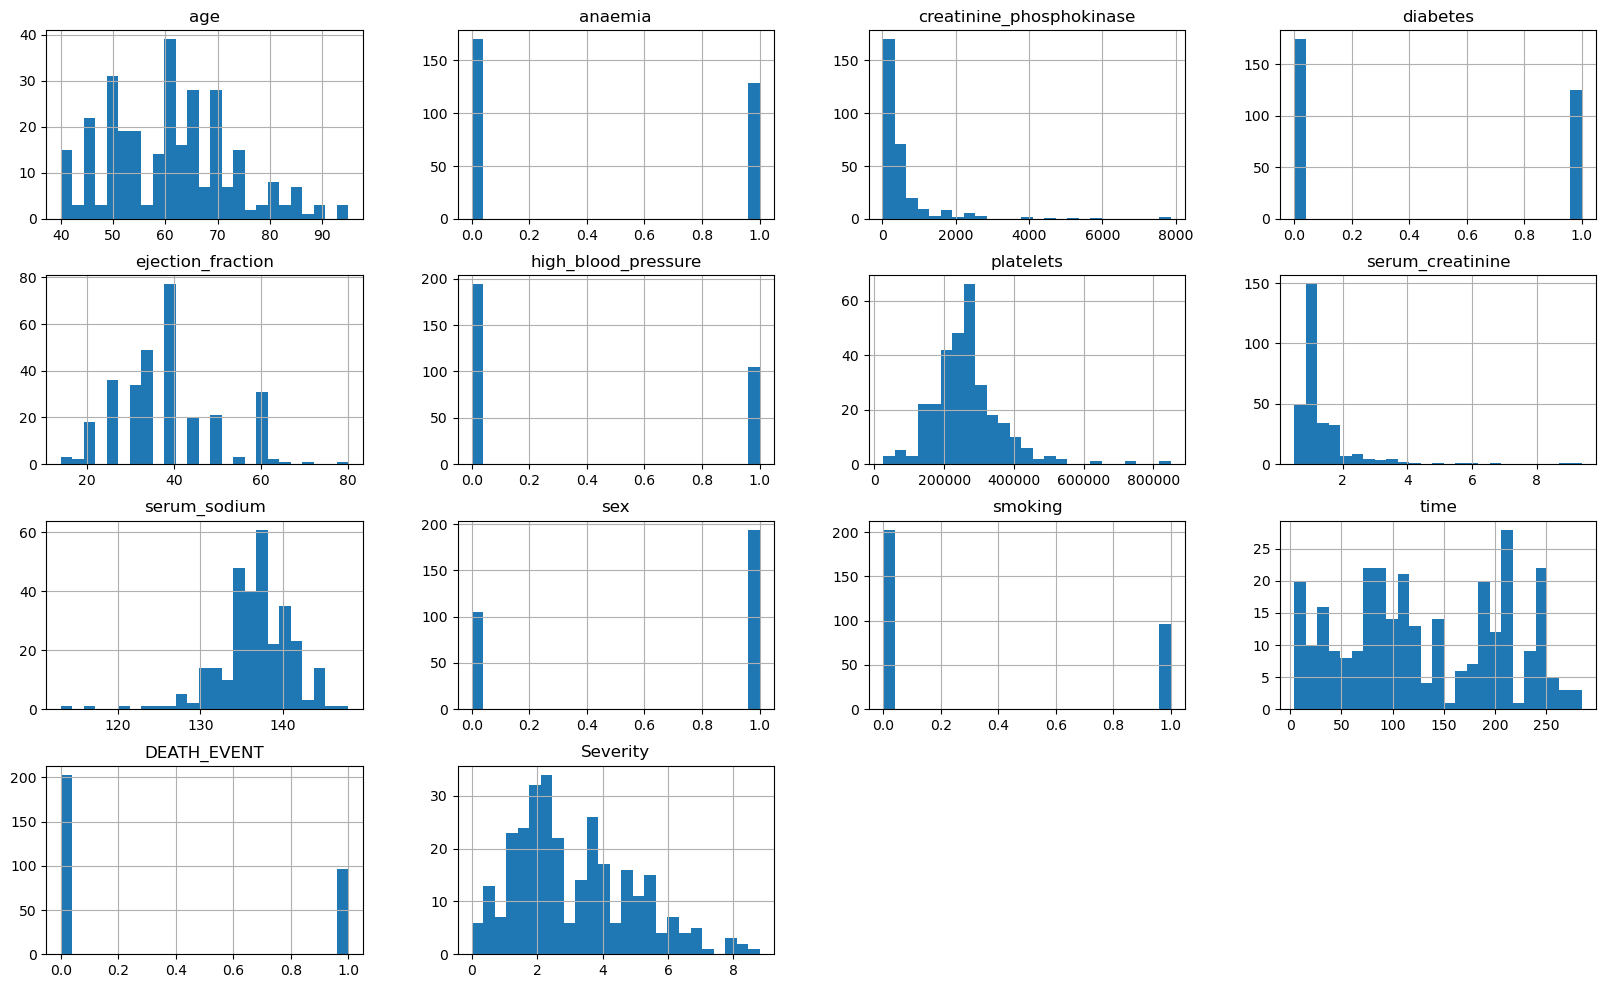

In [298]:
#Corresponding Histogram
df.hist(figsize=(20,12), bins=25)

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]),
 [Text(0, -200000.0, '−200000'),
  Text(0, 0.0, '0'),
  Text(0, 200000.0, '200000'),
  Text(0, 400000.0, '400000'),
  Text(0, 600000.0, '600000'),
  Text(0, 800000.0, '800000'),
  Text(0, 1000000.0, '1000000')])

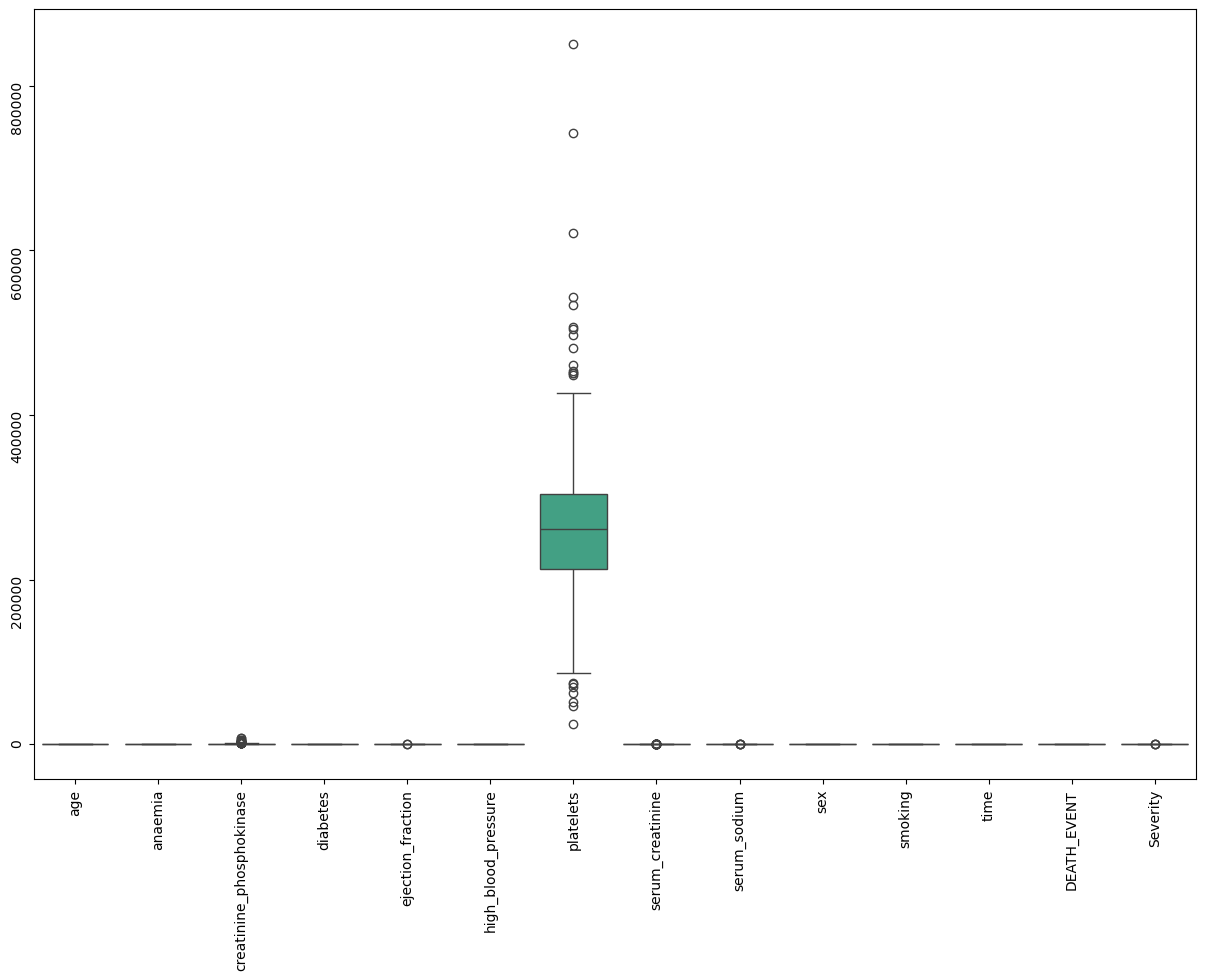

In [299]:
# Corresponding Box Plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.yticks(rotation=90)

Text(0.5, 1.0, 'Heatmap')

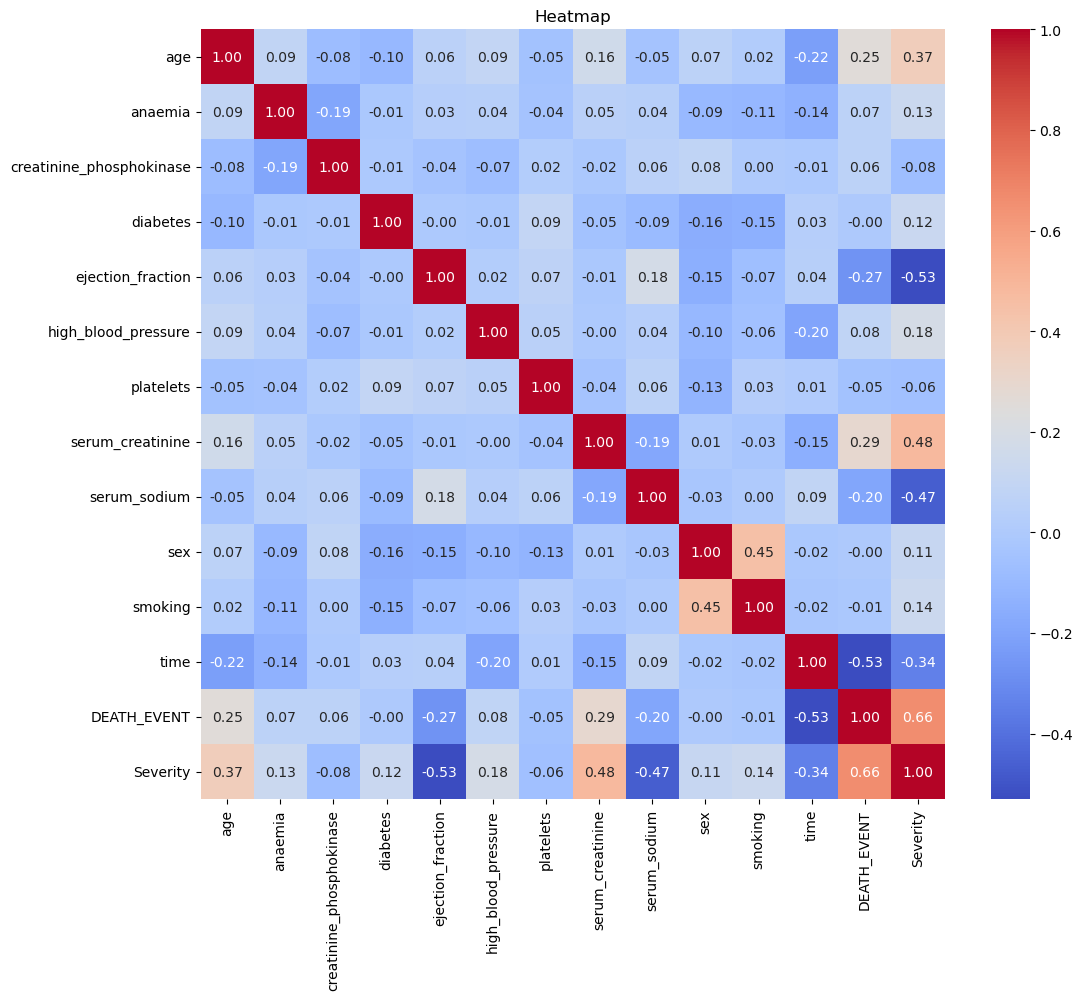

In [300]:
# Heat map
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap")

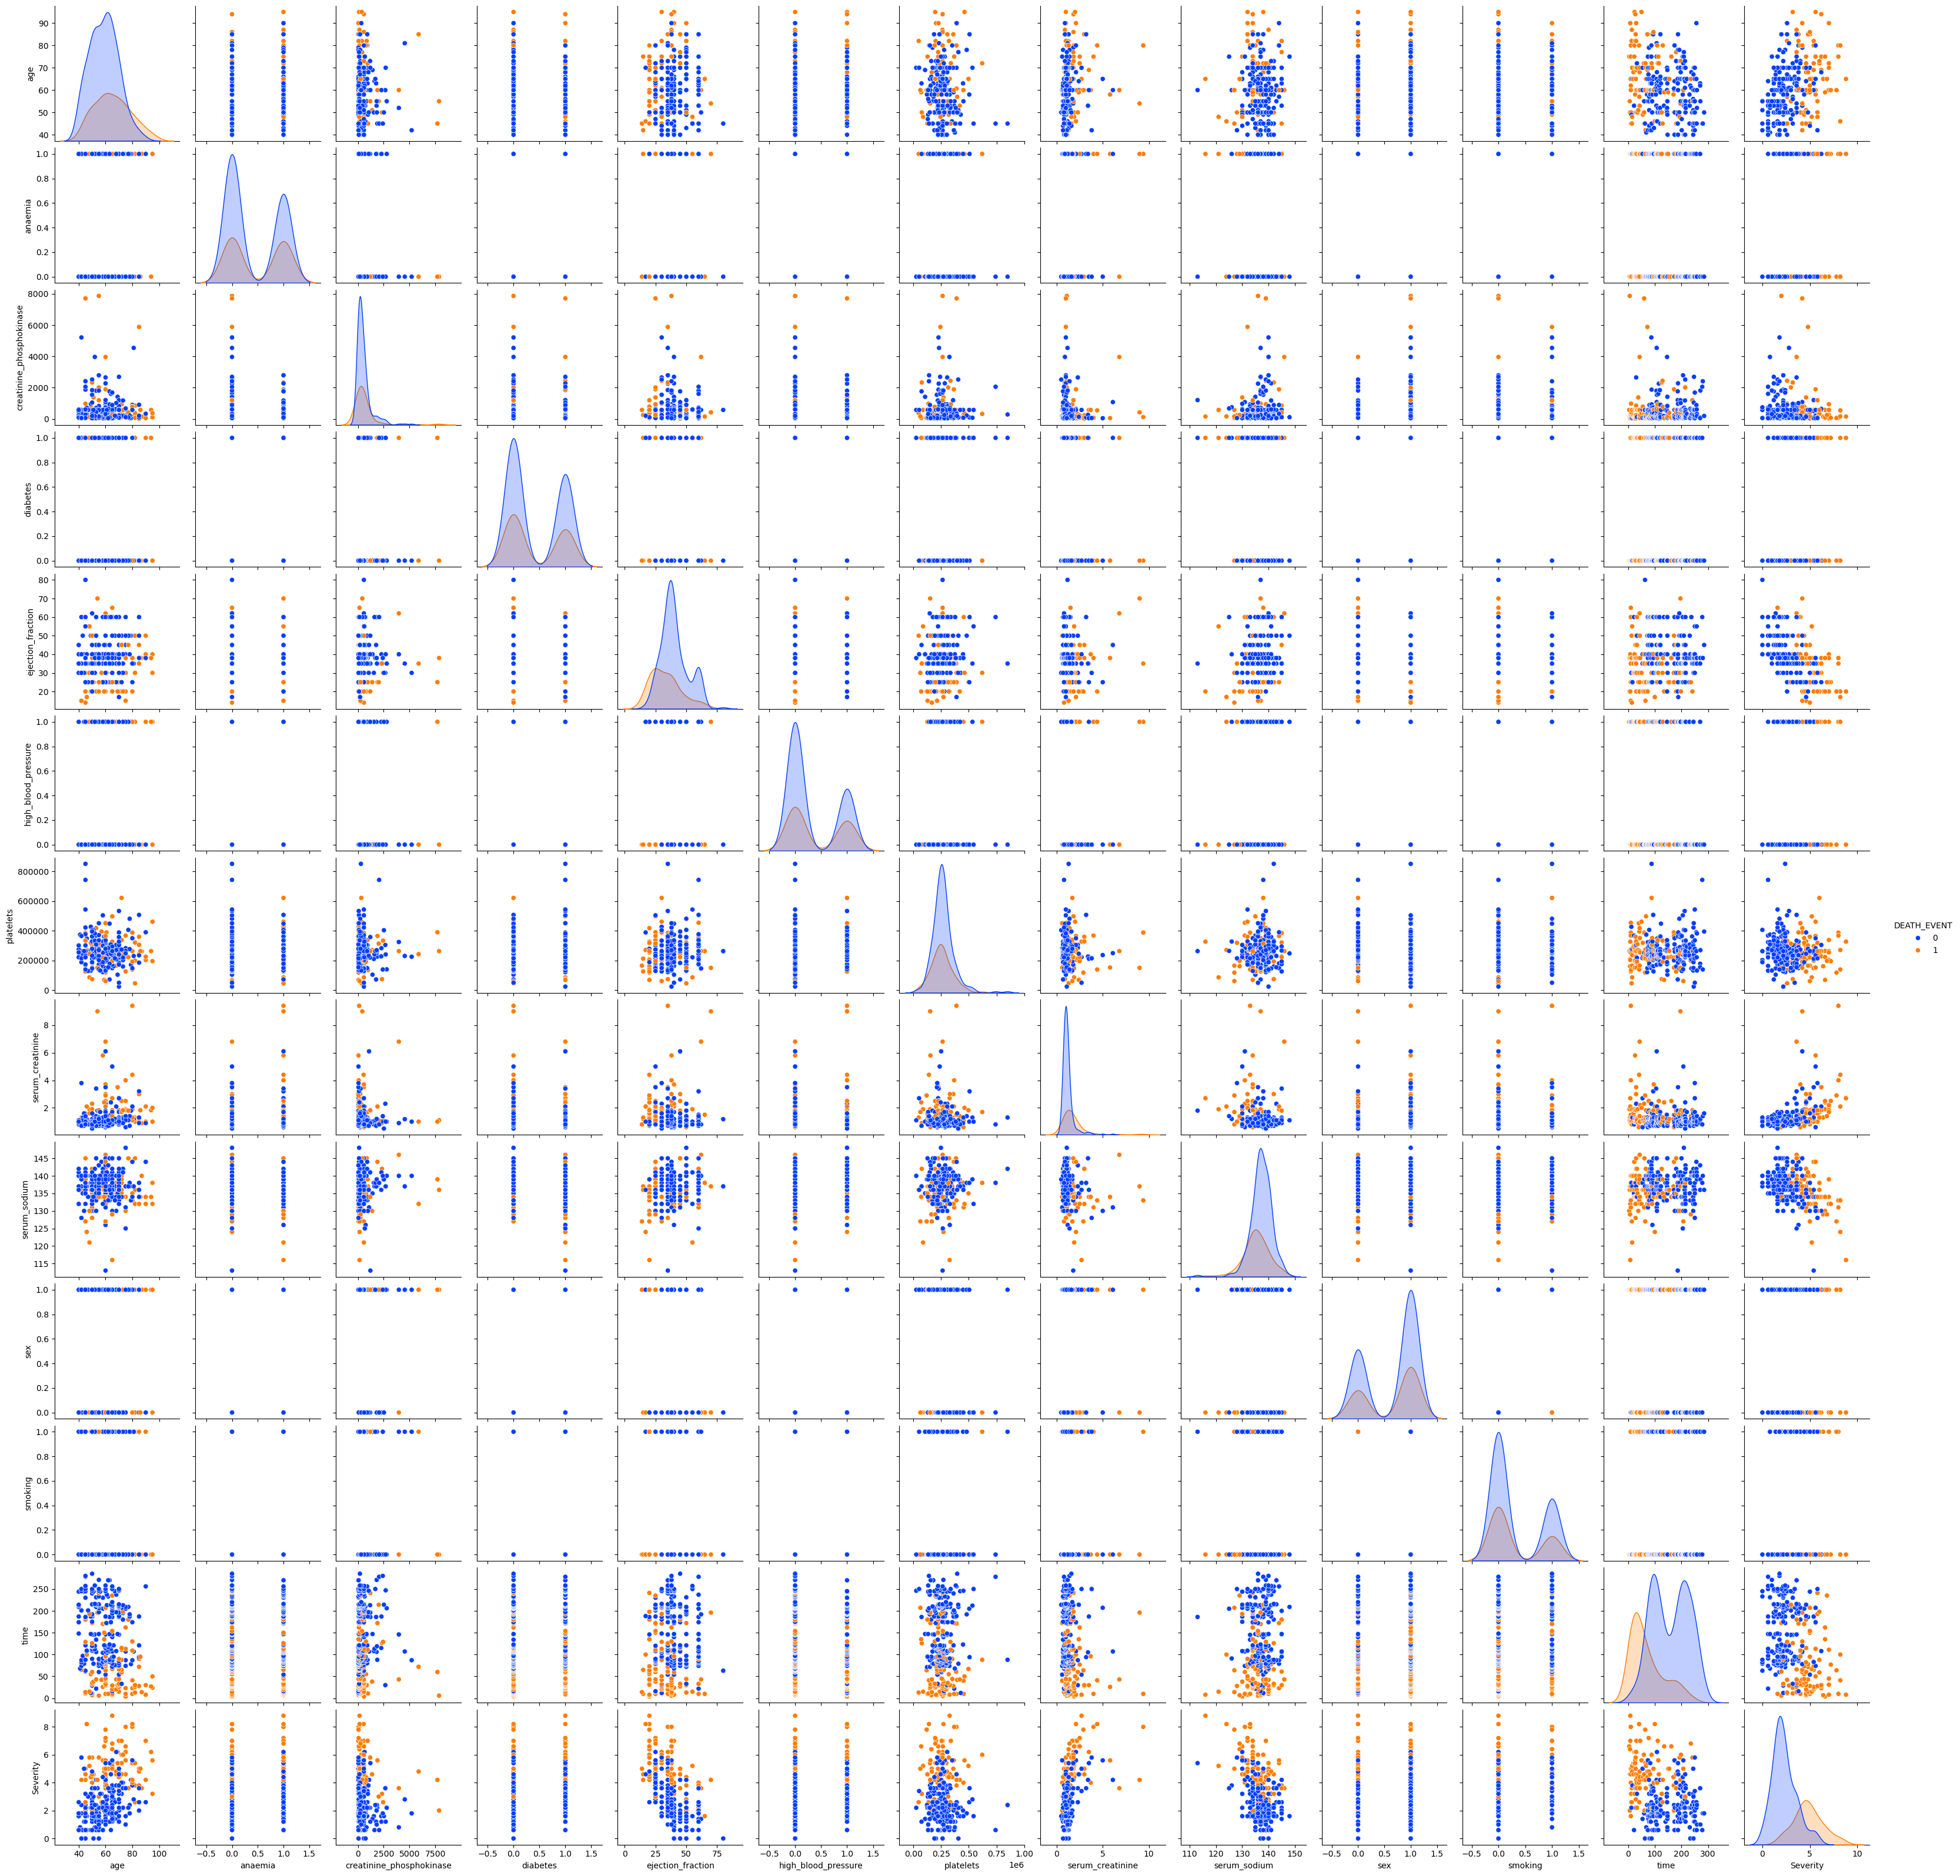

In [301]:
# Corresponding pairplots against Death_Event
sns.pairplot(df, hue="DEATH_EVENT", palette = "bright")

In [303]:
#Task 2

In [305]:
# Split data & label, ignore death_event

data = df.iloc [:,:-2].to_numpy()
label = df.iloc [:,-1].to_numpy()

Label Distribution: {0.0: 6, 0.6: 13, 0.8: 4, 1.0: 3, 1.2: 15, 1.4: 8, 1.6: 24, 1.8: 19, 2.0: 13, 2.2: 20, 2.4: 14, 2.6: 15, 2.8: 7, 3.0: 6, 3.2: 10, 3.4: 4, 3.6: 16, 3.8: 10, 4.0: 7, 4.2: 10, 4.4: 6, 4.6: 11, 4.8: 5, 5.0: 9, 5.2: 2, 5.4: 8, 5.6: 7, 5.8: 4, 6.0: 3, 6.2: 4, 6.4: 1, 6.6: 3, 6.8: 1, 7.0: 4, 7.2: 1, 7.8: 1, 8.0: 2, 8.2: 2, 8.8: 1}


/var/folders/nn/8mj616453yg4q70_np1n86c80000gn/T/ipykernel_1749/3615901971.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="viridis")


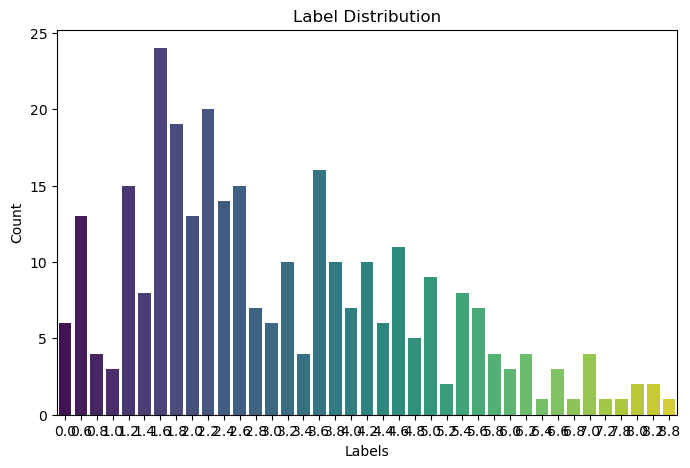

In [307]:
# Convert categorical labels to numerical (if necessary)
if label.dtype == 'O':  # Object type (categorical labels)
    label_encoder = LabelEncoder()
    label = label_encoder.fit_transform(label)

# Analyze Label Distribution
unique, counts = np.unique(label, return_counts=True)
label_dist = dict(zip(unique, counts))

print("Label Distribution:", label_dist)

# Plot Label Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=unique, y=counts, palette="viridis")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()

In [309]:
# Spilt  data
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(239, 12)
(60, 12)


In [310]:
# Linear Regression with trained data
L = LinearRegression()
L.fit(X_train,y_train)
y_pred = L.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(L.coef_)

0.6250508974255925
[ 4.15390293e-02  4.32842019e-01 -2.40643354e-05  6.68269732e-01
 -7.49137406e-02  6.54512735e-01 -1.76164562e-07  5.91337400e-01
 -1.15106838e-01 -9.43956353e-02  6.37516446e-01 -3.28337579e-03]


In [311]:
# ridge Regression with trained data
R= Ridge(alpha = 0.004)
R.fit(X_train, y_train)
y_pred = R.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(R.coef_)

0.6250353330900651
[ 4.15391815e-02  4.32805776e-01 -2.40709462e-05  6.68215227e-01
 -7.49137223e-02  6.54460761e-01 -1.76100564e-07  5.91327174e-01
 -1.15107202e-01 -9.43726286e-02  6.37436652e-01 -3.28346265e-03]


In [312]:
# lasso Regression with trained data & features
R1= Lasso(alpha = 0.004)
R1.fit(X_train, y_train)
y_pred = R1.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(R1.coef_)

coeffs = R1.coef_
features = np.where(coeffs != 0)[0]
print("Index of Important features: ", features)


0.6175671434538597
[ 4.15275167e-02  4.14973102e-01 -2.76058061e-05  6.50758257e-01
 -7.47997072e-02  6.36756501e-01 -1.42075383e-07  5.87513960e-01
 -1.15016335e-01 -6.59002745e-02  5.98363953e-01 -3.32420659e-03]
Index of Important features:  [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [313]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [314]:
# Kernel function
def compute_kernel(X1, X2, kernel='linear', **kwargs):
    if kernel == 'linear':
        return X1 @ X2.T
    elif kernel == 'polynomial':
        degree = kwargs.get('degree', 3)
        coef0 = kwargs.get('coef0', 1)
        return (X1 @ X2.T + coef0) ** degree
    elif kernel == 'rbf':
        gamma = kwargs.get('gamma', 0.5)
        X1_sq = np.sum(X1**2, axis=1).reshape(-1, 1)
        X2_sq = np.sum(X2**2, axis=1).reshape(1, -1)
        dist_sq = X1_sq - 2 * X1 @ X2.T + X2_sq
        return np.exp(-gamma * dist_sq)
    else:
        raise ValueError(f"Unknown kernel type: {kernel}")

In [315]:
# Kernel regression function
def kernel_regression(X_train, y_train, X_test, kernel='rbf', alpha=1e-2, **kwargs):
    K = compute_kernel(X_train, X_train, kernel=kernel, **kwargs)
    K_tilde = K + alpha * np.eye(len(K))
    c = np.linalg.solve(K_tilde, y_train)
    K_test = compute_kernel(X_test, X_train, kernel=kernel, **kwargs)
    y_pred = K_test @ c
    return y_pred

In [316]:
#Kernel Regression with linear kernel
# === LINEAR KERNEL ===
y_pred_linear = kernel_regression(X_train, y_train, X_test, kernel='linear', alpha=0.01)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"LINEAR Kernel MSE: {mse_linear:.4f}")


LINEAR Kernel MSE: 0.8737


In [317]:
#Kernel Regression with linear kernel using svr
svr_linear = SVR(kernel= "linear")
svr_linear.fit(X_train_scaled, y_train)
y_pred = svr_linear.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))


0.6013097070512056


In [318]:
# === POLYNOMIAL KERNEL ===
y_pred_poly = kernel_regression(X_train_scaled, y_train, X_test_scaled, kernel='polynomial', alpha=1, degree=2, coef0=1)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"POLYNOMIAL Kernel MSE: {mse_poly:.4f}")


POLYNOMIAL Kernel MSE: 0.6125


In [319]:
#Kernel Regression with poly kernel using svr
svr_linear = SVR(kernel= "poly", degree =2)
svr_linear.fit(X_train_scaled, y_train)
y_pred = svr_linear.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))


3.297512781343139


In [320]:
# === RBF KERNEL ===
y_pred_rbf = kernel_regression(X_train, y_train, X_test, kernel='rbf', alpha=0.0002, gamma=0.5)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print(f"RBF Kernel MSE: {mse_rbf:.4f}")


RBF Kernel MSE: 13.1187


In [321]:
#Kernel Regression with rbf kernel using svr
svr_linear = SVR(kernel= "rbf")
svr_linear.fit(X_train_scaled, y_train)
y_pred = svr_linear.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))


0.6272606155280215


In [322]:
#Discuss the strengths and weaknesses of the Linear, Ridge, and Kernel Regression models for predicting Severity.
#Linear regressions seems to be the quickest in providing results, as our data seems to have a few linear features. 
#From my experience in this project both ridge and linear perform similarly in predicting severity 
#Kernel regressions seems to preform the worst out of the three, although the poly kernel using a degree of 2, seems to preform the best out of them all.


In [323]:
#Task 3

In [324]:
data = df.drop(columns=["DEATH_EVENT", "Severity"])  # Features (remove target variable)
label = df["DEATH_EVENT"]  # Target variable


X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)



In [325]:
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 


In [326]:
L1 = LogisticRegression()
L1.fit(X_train,y_train)
y_pred = L1.predict(X_test)
print(mean_squared_error(y_test,y_pred))
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluation metrics
print(f"Accuracy: {accuracy* 100:}")
print(f"Precision: {precision* 100:}")
print(f"Recall: {recall* 100:}")

0.18333333333333332
Accuracy: 81.66666666666667
Precision: 75.0
Recall: 71.42857142857143


In [327]:
#Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict
y_pred = nb_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluation metrics
print(f"Accuracy: {accuracy* 100:}")
print(f"Precision: {precision* 100:}")
print(f"Recall: {recall* 100:}")


Accuracy: 73.33333333333333
Precision: 66.66666666666666
Recall: 47.61904761904761


In [328]:
#Random Forest Classifier
RF = RandomForestClassifier(n_estimators= 100)
RF.fit(X_train, y_train)
# Predict
y_pred = RF.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluation metrics
print(f"Accuracy: {accuracy* 100:}")
print(f"Precision: {precision* 100:}")
print(f"Recall: {recall* 100:}")

Accuracy: 81.66666666666667
Precision: 77.77777777777779
Recall: 66.66666666666666


In [329]:
#SVM Classifier
SVMC = SVC(kernel = "linear")
SVMC.fit(X_train, y_train)
# Predict
y_pred = SVMC.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluation metrics
print(f"Accuracy: {accuracy* 100:}")
print(f"Precision: {precision* 100:}")
print(f"Recall: {recall* 100:}")

Accuracy: 80.0
Precision: 73.68421052631578
Recall: 66.66666666666666


In [357]:
#SVM Classifier
SVMC = SVC(kernel = "poly")
SVMC.fit(X_train, y_train)
# Predict
y_pred = SVMC.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluation metrics
print(f"Accuracy: {accuracy* 100:}")
print(f"Precision: {precision* 100:}")
print(f"Recall: {recall* 100:}")

Accuracy: 78.33333333333333
Precision: 90.0
Recall: 42.857142857142854


In [359]:
#SVM Classifier
SVMC = SVC(kernel = "rbf")
SVMC.fit(X_train, y_train)
# Predict
y_pred = SVMC.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluation metrics
print(f"Accuracy: {accuracy* 100:}")
print(f"Precision: {precision* 100:}")
print(f"Recall: {recall* 100:}")

Accuracy: 78.33333333333333
Precision: 75.0
Recall: 57.14285714285714


In [330]:
#3.4. Discuss the effectiveness of different classifiers in predicting patient mortality
# Using naive bayes we get an accuracy of 70% a precision of 66% and a recall of 47% this classifer performs the worst out of the three
#allowing for quicker results. Random Forest gives us the highest accuracy of 91% followed by a 77% precision and 66% recall, although
#slightly slower than the rest, it still preforms the best. SVM with a linear kernel provides the highest accuracy and recall,however poly kernel 
# gives the highest precision where the rbf kernel falls short in all cases.